<a href="https://colab.research.google.com/github/abhay43/ML_Code/blob/master/DL-%20Auto%20Decoder%20using%20multi-layer%20in%20mnist%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Input

import numpy as np

In [108]:
# Creating the layers 
input_img = Input(shape=(784, ))

# encoded layer 
encoded = Dense(32, activation ='relu')(input_img)
encoded2 = Dense(64, activation ='relu')(encoded)
#encoded3 = Dense(512, activation ='relu')(encoded2)
#encoded4 = Dense(1024, activation ='relu')(encoded3)
# decoded layer 
decoded = Dense(784, activation = 'sigmoid')(encoded2)



In [109]:
model_0 = Model(input_img, decoded)
model_0.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_23 (Dense)             (None, 784)               50960     
Total params: 78,192
Trainable params: 78,192
Non-trainable params: 0
_________________________________________________________________


In [111]:
encoded_model_0 = Model(input_img, encoded2)
encoded_model_0.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
Total params: 27,232
Trainable params: 27,232
Non-trainable params: 0
_________________________________________________________________


In [138]:
encoder_input = Input(shape=(64,)) 
#encoder_input2 = Dense(64, activation = 'relu')(encoder_input)
#encoder_input3 = Dense(64, activation = 'relu')(encoder_input2)
#encoder_input4 = Dense(512, activation = 'relu')(encoder_input3)
#encoder_input5 = Dense(784, activation = 'relu')(encoder_input4)
decoder_output = model_0.layers[-1]

In [139]:
decoded_model_0 = Model(encoder_input, decoder_output(encoder_input)) 
decoded_model_0.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 64)]              0         
_________________________________________________________________
dense_23 (Dense)             (None, 784)               50960     
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


In [140]:
model_0.compile(
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    loss=['binary_crossentropy']
)

In [141]:
model_0.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_23 (Dense)             (None, 784)               50960     
Total params: 78,192
Trainable params: 78,192
Non-trainable params: 0
_________________________________________________________________


In [142]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [143]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32')/ 255

x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

In [144]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [145]:
model_0.fit(
    x_train, x_train, batch_size = 250, epochs = 30, shuffle= True, verbose = 1, validation_data=(x_test, x_test)
)

Epoch 1/30
240/240 [==============================] - 3s 11ms/step - loss: 0.0934 - val_loss: 0.0920
Epoch 2/30
240/240 [==============================] - 2s 10ms/step - loss: 0.0931 - val_loss: 0.0919
Epoch 3/30
240/240 [==============================] - 2s 10ms/step - loss: 0.0931 - val_loss: 0.0920
Epoch 4/30
240/240 [==============================] - 3s 11ms/step - loss: 0.0930 - val_loss: 0.0919
Epoch 5/30
240/240 [==============================] - 2s 10ms/step - loss: 0.0930 - val_loss: 0.0918
Epoch 6/30
240/240 [==============================] - 2s 10ms/step - loss: 0.0929 - val_loss: 0.0918
Epoch 7/30
240/240 [==============================] - 2s 10ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 8/30
240/240 [==============================] - 2s 10ms/step - loss: 0.0928 - val_loss: 0.0916
Epoch 9/30
240/240 [==============================] - 2s 10ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 10/30
240/240 [==============================] - 2s 10ms/step - loss: 0.0927 - val_lo

In [146]:
encoded_img = encoded_model_0.predict(x_test)

In [136]:
s = encoded_img.reshape(10000,8,8)


In [147]:
encoded_img.shape

(10000, 64)

In [148]:
decoded_img = decoded_model_0.predict(encoded_img)

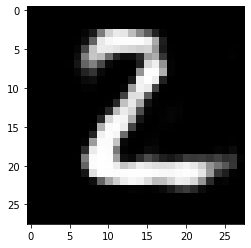

In [149]:
plt.imshow(decoded_img[1].reshape(28,28))

In [ ]:
#Result in vanilla decoder 

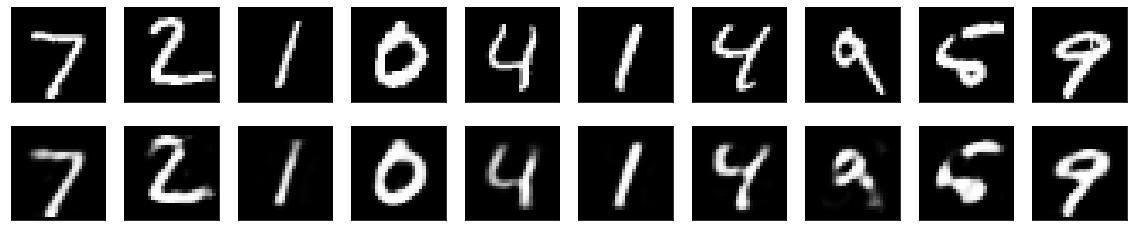

In [107]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
  ax = plt.subplot(2, n , i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n , i+1 +n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


In [151]:
# using multilayer decoder

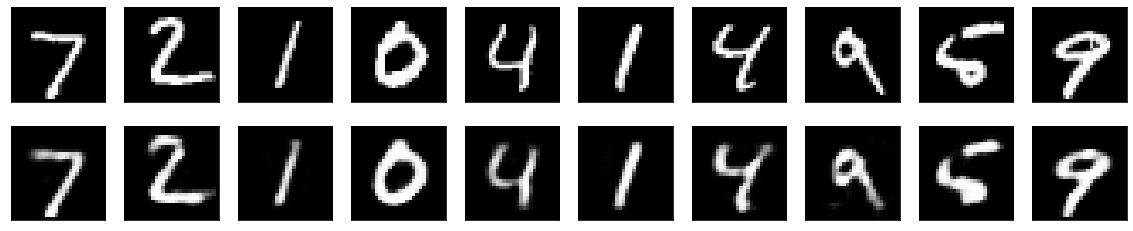

In [150]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
  ax = plt.subplot(2, n , i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n , i+1 +n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
